In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from weka.classifiers import Classifier

from weka.core.converters import Loader
from weka.classifiers import Classifier
import weka.core.jvm as jvm

## create data

In [3]:
def save_as_arff(filename, df):
    df.to_csv(filename, header=None, index=None)
    with open(filename, "r+") as fp:
        content = fp.read()
        fp.seek(0, 0)
        fp.write('''@RELATION signals
        
@ATTRIBUTE env_temp NUMERIC
@ATTRIBUTE rh NUMERIC
@ATTRIBUTE heart_rate NUMERIC
@ATTRIBUTE stress_level NUMERIC
@ATTRIBUTE skin_temp NUMERIC
@ATTRIBUTE eda NUMERIC
@ATTRIBUTE Clo NUMERIC
@ATTRIBUTE Act NUMERIC
@ATTRIBUTE TC {1.0,2.0,3.0,4.0,5.0,6.0,7.0}

@DATA\n''' + content)


In [4]:
def createPesonOtdData(person_path, temp_start = 150, temp_end = 351, interval=5):
    df = pd.read_csv(person_path)
    ids = list(df['ID'])
    df = df.drop(['ID', 'env_temp'], axis=1)
    
    col_names = list(df.columns)
    col_names = ['env_temp'] + col_names
    col_names
    
    for i in range(df.shape[0]):
        person_id = ids[i]
        person_row = df.iloc[i,:]
        df_person = pd.DataFrame(columns=col_names)
        
        for t in range(temp_start, temp_end, interval):
            person_row['env_temp'] = t / 10.0
            df_person = df_person.append(person_row)
            
        df_person = df_person.reset_index(drop=True)
        filename = './data_for_dt_prediction/%d.arff' % person_id
        save_as_arff(filename, df_person)

In [5]:
person_path = "./data_for_dt_prediction/decision_tree_model_data.csv"
temp_start = 150
temp_end = 351
interval = 5
createPesonOtdData(person_path, temp_start, temp_end, interval)

D:\software\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\software\Anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## prediction

In [6]:
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['D:\\software\\Anaconda3\\envs\\ml\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'D:\\software\\Anaconda3\\envs\\ml\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'D:\\software\\Anaconda3\\envs\\ml\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'D:\\software\\Anaconda3\\envs\\ml\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'D:\\software\\Anaconda3\\envs\\ml\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [7]:
def predict(data_filepath, model_filepath):
    # load data
    loader = Loader(classname="weka.core.converters.ArffLoader")
    data = loader.load_file(data_filepath)
    data.class_is_last()
    
    # load model
    model, _ = Classifier.deserialize(model_filepath)
    
    # predict
    pred = []
    for index, inst in enumerate(data):
        p = model.classify_instance(inst)
        pred.append(p)
        
    return pred

In [8]:
preds = []
for n in [4, 5, 10, 12, 14, 22]:
    data_filepath = "./data_for_dt_prediction/%d.arff" % (n)
    model_filepath = "%d.model" % (n)
    pred = predict(data_filepath, model_filepath)
    preds.append(pred)

In [9]:
preds

[[3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0],
 [3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  4.0,
  4.0,
  4.0,
  3.0,
  3.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0],
 [2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0],
 [3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3

In [10]:
def computeOTD(tcList):
    numOfPeople = len(tcList)
    otd_value = 0
    for tc in tcList:
        if tc >= 4.0:
            continue
        elif tc == 3.0:
            otd_value += 1
        elif tc == 2.0:
            otd_value += numOfPeople + 1
        elif tc == 1.0:
            otd_value += 2 * (numOfPeople + 1)
    return otd_value

In [24]:
otds = []
tcMatrix = []
curTemp = temp_start / 10.0
for i in range(len(preds[0])):
    tcList = [preds[j][i] for j in range(len(preds))]
#     print(tcList)
    
    otd = computeOTD(tcList)
    otds.append(otd)
    
    tcMatrix.append([curTemp] + tcList)
    curTemp += interval / 10.0

In [26]:
cols = ['test_env_temp', 'tc_4', 'tc_5', 'tc_10', 'tc_12', 'tc_14', 'tc_22']
df_tcMatrix = pd.DataFrame(tcMatrix, columns=cols)
display(df_tcMatrix)

,test_env_temp,tc_4,tc_5,tc_10,tc_12,tc_14,tc_22
0,15.0,3.0,3.0,2.0,3.0,2.0,3.0
1,15.5,3.0,3.0,2.0,3.0,2.0,3.0
2,16.0,3.0,3.0,2.0,3.0,2.0,3.0
3,16.5,3.0,3.0,2.0,3.0,2.0,3.0
4,17.0,3.0,3.0,2.0,3.0,2.0,3.0
5,17.5,3.0,3.0,2.0,3.0,2.0,3.0
6,18.0,3.0,3.0,2.0,3.0,2.0,3.0
7,18.5,3.0,3.0,2.0,3.0,2.0,3.0
8,19.0,3.0,3.0,2.0,3.0,2.0,3.0
9,19.5,3.0,3.0,2.0,3.0,2.0,3.0


In [ ]:
df_tcMatrix.to_csv('./model2_integrated_model_middle_dat')

In [12]:
otds

[18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 25,
 17,
 17,
 10,
 10,
 10,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [13]:
d = {
    "temperature(°C)": pd.Series([t/10.0 for t in range(temp_start, temp_end, interval)]),
    "otd": pd.Series(otds)
}
df_otd = pd.DataFrame(d)

In [14]:
df_otd

,temperature(°C),otd
0,15.0,18
1,15.5,18
2,16.0,18
3,16.5,18
4,17.0,18
5,17.5,18
6,18.0,18
7,18.5,18
8,19.0,18
9,19.5,18


In [15]:
def drawOtdValue(df):
    ct = sns.color_palette()
    ct = [ct[2], ct[3]]
    sns.set_theme(style="darkgrid")
    sns.relplot(x="temperature(°C)", y="otd", data=df, palette=ct, \
                height=7, aspect=16/9)

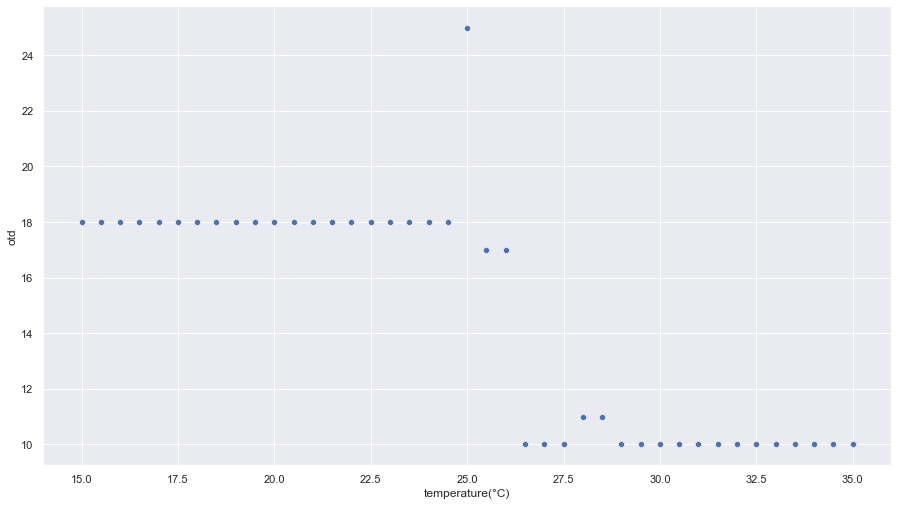

In [16]:
drawOtdValue(df_otd)

In [17]:
jvm.stop()